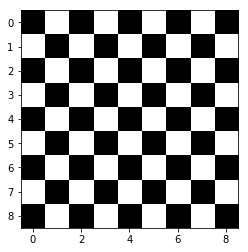

In [59]:
import numpy as np
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest')
plt.show()

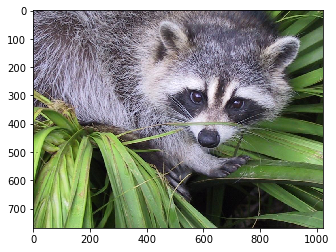

In [16]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [17]:
##Haciendo un array numpy a partir de una imagen

from scipy import misc
face = misc.face()
misc.imsave('face.png', face) # Primero se debe crear el archivo .png

face = misc.imread('face.png')
type(face)      

face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [18]:
face.tofile('face.raw') # Creando un archivo .raw
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

face_from_raw.shape = (768, 1024, 3)

In [19]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))

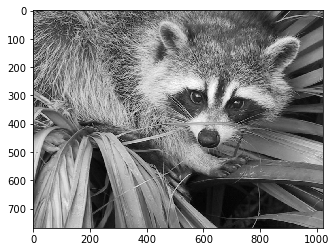

In [31]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

In [36]:
##Convert an image to 2D array in python


In [37]:
import Image
import numpy as np

im = Image.open("farm.jpg")
col,row =  im.size
data = np.zeros((row*col, 5))
pixels = im.load()
for i in range(row):
    for j in range(col):
        r,g,b =  pixels[i,j]
        data[i*col + j,:] = r,g,b,i,j

ModuleNotFoundError: No module named 'Image'

In [38]:
from skimage import data
f = data.camera()
data.imsave('camera.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

AttributeError: module 'skimage.data' has no attribute 'imsave'

In [49]:
from skimage import data
from skimage.data import imread
im = imread("camera")

FileNotFoundError: [Errno 2] No such file or directory: 'camera'

In [45]:
import os
os.path.dirname(os.path.abspath(anaconda))

NameError: name 'anaconda' is not defined

In [61]:
from skimage import io

In [1]:
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

io.imsave('camera1.png', camera)
camera.imshow()
camera.show()

NameError: name 'skimage' is not defined

In [ ]:
## 1. Recibir el path de un archivo de imagen png

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

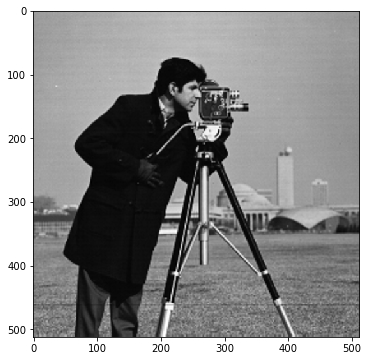

In [13]:

img = Image.open('camera.png')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

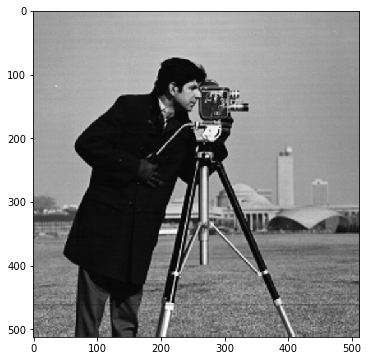

In [21]:
## Conversión de la imagen en una matriz de numpy
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [22]:
## 2. Realizar y verificar la descomposición SVD
U, sigma, VT = np.linalg.svd(imgmat)

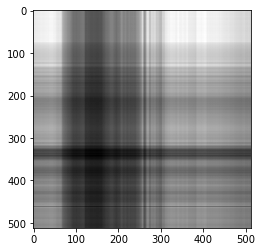

In [26]:
## Aproximación de la imagen utilizando la primera columna de U y la primera fila de VT
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(VT[:1, :])
plt.imshow(reconstimg, cmap='gray');

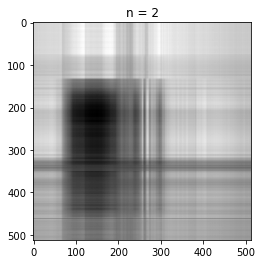

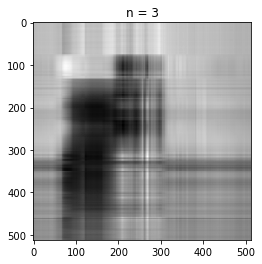

In [34]:
## Aproximación de la imagen utilizando únicamente los vectores segundo y tercero
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()


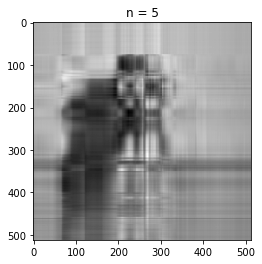

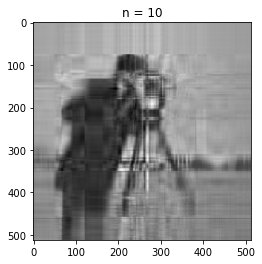

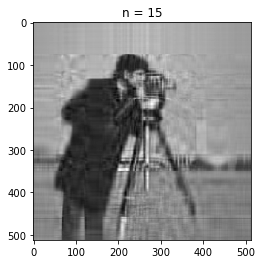

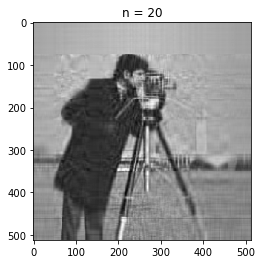

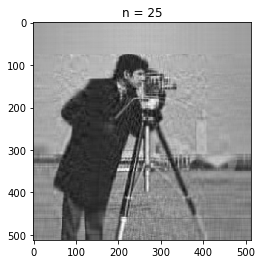

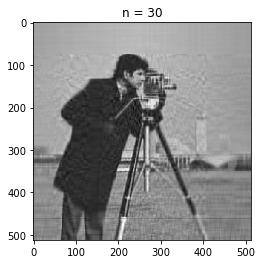

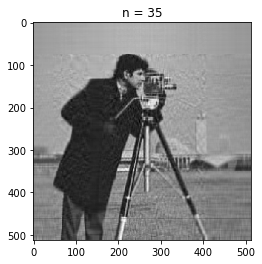

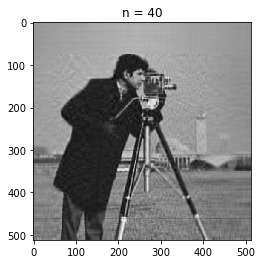

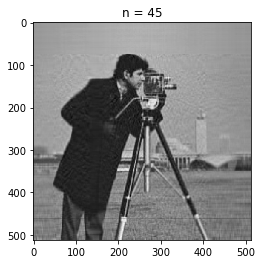

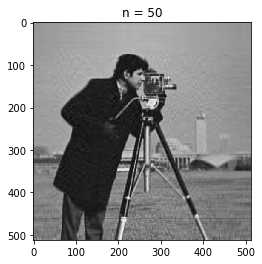

In [35]:
## Aproximación de la imagen utilizando los primeros 50 vectores de la SVD
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()